# Part I

## Botanical Research

### An Automated classifier to determine the flower species with its image

### 1. Loading and Understanding the Data

In [1]:
# Adding Required Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

In [2]:
# Reading the image from the path
images_path = "C:\\Users\\Rajathi\\Desktop\\Raji-PhD Documents\\IITD\\Course documents\\Deep Learning for AI\\Project\\Project 2\\flowers.zip"

In [3]:
#Reading the zip files
from zipfile import ZipFile
with ZipFile(images_path, 'r') as z:
  z.extractall()

In [7]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


#### Read the images, Resize the image to 128 x 128, and Get the image labels from the folder name

In [4]:
import os
import cv2

X = []
y = []

# list all folders inside train directory
for i in os.listdir('flowers'):
    print(i)          
    for j in os.listdir('flowers/' + i):
      # read each image inside train directory one by one
      dummy = cv2.imread('flowers/' + i + "/" + j)
      dummy = cv2.resize(dummy, (128, 128))
      X.append(dummy)
      y.append(i)

daisy
dandelion
rose
sunflower
tulip


[ 332 1047  290 2442 1339  195  757 3215 3322 2656]


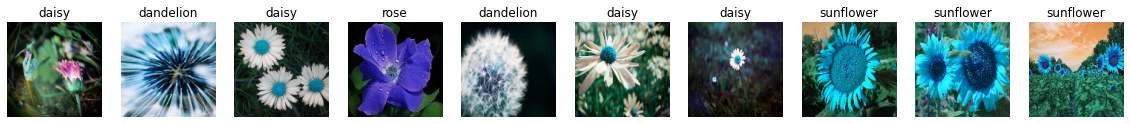

In [5]:
# visualizing the random images in the dataset along with their labels

# VISUALIZATION
import matplotlib.pyplot as plt # MATPLOTLIB FOR PLOTTING
import numpy as np
rand = np.random.randint(0, len(X), 10) # Generating 10 random numbers out of total number of flowers
print(rand)
plt.figure(figsize=(20, 15))
for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    plt.imshow(X[j])  # greens, reds, blues, rgb
    plt.title("{}".format(y[j]))
    plt.axis('off')
plt.show()

### 2. Data Preparation

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)
print(len(X_train))
print(len(X_val))

3453
864


In [7]:
## One hot encode the target variable
y_train = pd.get_dummies(y_train).values
y_val = pd.get_dummies(y_val).values

## Convert data from list to array
X_train = np.array(X_train)
X_val = np.array(X_val)

In [8]:
## Normalization
X_train = X_train.astype('float32')
X_train = X_train.reshape(X_train.shape[0],128,128,3)
X_train = X_train / 255.

X_val = X_val.astype('float32')
X_val = X_val.reshape(X_val.shape[0], 128,128,3)
X_val = X_val / 255.

In [9]:
## Check the min and max values after normalization
print('Train data------------','max:',X_train.max(), 'min:',X_train.min())
print('Validation data-------','max:',X_val.max(), 'min:',X_val.min())

Train data------------ max: 1.0 min: 0.0
Validation data------- max: 1.0 min: 0.0


In [10]:
# DATA SET SHAPE AND SIZE
print('\nTraining data : ', X_train.shape, y_train.shape)  # TRAIN
print('\nTesting data : ', X_val.shape, y_val.shape) 


Training data :  (3453, 128, 128, 3) (3453, 5)

Testing data :  (864, 128, 128, 3) (864, 5)


### 3.Model Building,Tuning and Testing

#### CNN Classifier Model 1

In [11]:
# model architecture building
model = Sequential()

model.add(BatchNormalization(input_shape = (128, 128, 3)))

model.add(Convolution2D(filters = 32, kernel_size = 3, activation ='relu', input_shape = (128, 128, 3))) 
model.add(MaxPooling2D(pool_size = 2))

model.add(Convolution2D(filters = 64, kernel_size = 4, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Convolution2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Convolution2D(filters = 128, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Flatten()) 

# fully connected layer
model.add(Dense(units = 128,activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))

model.add(Dense(units = 5, activation = 'softmax')) 

In [12]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam()
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 128, 128, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                        

In [13]:
MODEL = model.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_val), initial_epoch=0)

Epoch 1/10
108/108 [==============================] - 106s 962ms/step - loss: 1.2655 - accuracy: 0.4495 - val_loss: 1.2104 - val_accuracy: 0.5243
Epoch 2/10
108/108 [==============================] - 101s 933ms/step - loss: 1.0704 - accuracy: 0.5717 - val_loss: 1.0497 - val_accuracy: 0.5972
Epoch 3/10
108/108 [==============================] - 104s 964ms/step - loss: 0.9238 - accuracy: 0.6409 - val_loss: 0.9860 - val_accuracy: 0.6088
Epoch 4/10
108/108 [==============================] - 111s 1s/step - loss: 0.8326 - accuracy: 0.6727 - val_loss: 0.8454 - val_accuracy: 0.6794
Epoch 5/10
108/108 [==============================] - 109s 1s/step - loss: 0.7319 - accuracy: 0.7237 - val_loss: 0.8294 - val_accuracy: 0.6806
Epoch 6/10
108/108 [==============================] - 105s 974ms/step - loss: 0.6295 - accuracy: 0.7573 - val_loss: 0.8266 - val_accuracy: 0.6887
Epoch 7/10
108/108 [==============================] - 100s 926ms/step - loss: 0.5327 - accuracy: 0.7979 - val_loss: 0.9028 - val_a

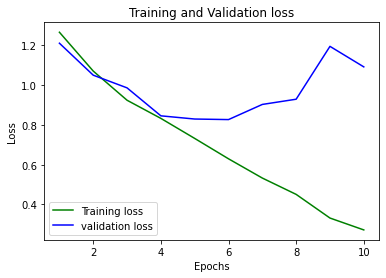

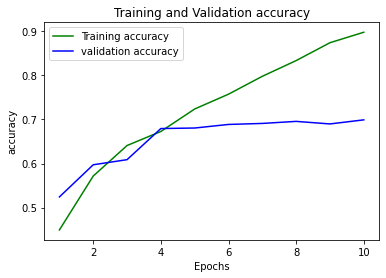

In [14]:
# Accuracy and Loss plots 

EPOCH=10
epochs = range(1,EPOCH+1)

loss_train = MODEL.history['loss']
loss_val = MODEL.history['val_loss']
Acc_train = MODEL.history['accuracy']
Acc_val = MODEL.history['val_accuracy']

# Loss Vs Epochs
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy Vs Epochs
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#### CNN Classifier Model 2

In [37]:
# model architecture building
model1 = Sequential()

model1.add(BatchNormalization(input_shape = (128, 128, 3)))

model1.add(Convolution2D(filters = 32, kernel_size = 3, activation ='relu', input_shape = (128, 128, 3))) 
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.3))

model1.add(Convolution2D(filters = 64, kernel_size = 4, padding = 'same', activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.5))

model1.add(Convolution2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.5))

model1.add(Convolution2D(filters = 128, kernel_size = 2, padding = 'same', activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.5))

model1.add(Flatten()) 

# fully connected layer
model1.add(Dense(units = 128,activation = 'relu'))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 32, activation = 'relu'))
model1.add(Dense(units = 16, activation = 'relu'))

model1.add(Dense(units = 5, activation = 'softmax')) 

In [38]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(lr=0.001)
model1.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_26 (Bat  (None, 128, 128, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_24 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_27 (Bat  (None, 126, 126, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 63, 63, 32)        0         
                                                      

In [43]:
MODEL_1 = model1.fit(X_train, y_train, epochs = 30, batch_size=62, validation_data = (X_val, y_val), initial_epoch=0)

Epoch 1/30
56/56 [==============================] - 128s 2s/step - loss: 0.4680 - accuracy: 0.8262 - val_loss: 1.1185 - val_accuracy: 0.6829
Epoch 2/30
56/56 [==============================] - 136s 2s/step - loss: 0.4296 - accuracy: 0.8398 - val_loss: 1.3993 - val_accuracy: 0.6412
Epoch 3/30
56/56 [==============================] - 147s 3s/step - loss: 0.3911 - accuracy: 0.8569 - val_loss: 1.1913 - val_accuracy: 0.6979
Epoch 4/30
56/56 [==============================] - 151s 3s/step - loss: 0.3554 - accuracy: 0.8688 - val_loss: 1.3069 - val_accuracy: 0.6562
Epoch 5/30
56/56 [==============================] - 147s 3s/step - loss: 0.3591 - accuracy: 0.8674 - val_loss: 1.1677 - val_accuracy: 0.7153
Epoch 6/30
56/56 [==============================] - 143s 3s/step - loss: 0.3182 - accuracy: 0.8807 - val_loss: 1.1008 - val_accuracy: 0.7269
Epoch 7/30
56/56 [==============================] - 148s 3s/step - loss: 0.2963 - accuracy: 0.8844 - val_loss: 1.3113 - val_accuracy: 0.6898
Epoch 8/30
56

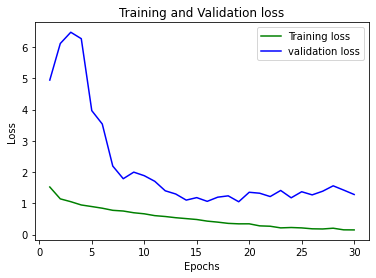

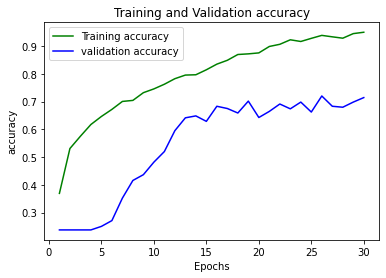

In [18]:
# Accuracy and Loss plots 

EPOCH=30
epochs = range(1,EPOCH+1)

loss_train = MODEL_1.history['loss']
loss_val = MODEL_1.history['val_loss']
Acc_train = MODEL_1.history['accuracy']
Acc_val = MODEL_1.history['val_accuracy']

# Loss Vs Epochs
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy Vs Epochs
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

From above accuracy and loss plots 

-- Initially the validation loss was very high compare to the training loss, similarly accuracy was less for validation initially.

With Comparison with the CNN Classifier model 1 we can note that the training accuracy is increased from 89% to 94% and the validation accuracy is increased from ~69% to 71% for CNN Classfier model 2, but still model is overfitted.

### Save The Model

In [19]:
# Saving the model
model1.save('cnn_flower.h5')
model1.save_weights('cnn_flower_weights.h5')

In [20]:
# load the model
from tensorflow.keras.models import load_model
model_cnn_normalized = load_model('cnn_flower.h5')
model_cnn_normalized.load_weights('cnn_flower_weights.h5')

### Prediction of the Test image

1/1 [==============================] - 0s 51ms/step


Softmax Outputs: [[9.9773312e-01 1.7876924e-03 1.6883663e-05 1.5913560e-04 3.0322722e-04]]


Predicted_Label: daisy


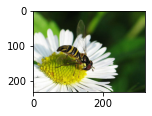

In [28]:
plt.figure(figsize=[2, 2])

test_image =plt.imread('C:\\Users\Rajathi\\Desktop\\Raji-PhD Documents\\IITD\\Course documents\\Deep Learning for AI\\Project\\Project 2\\flowers\\5547758_eea9edfd54_n.jpg')
plt.imshow(test_image)

# Resize the image to 128X128 shape to be compatible with the model
test_image = cv2.resize(test_image,(128,128))

# If not compatible expand the dimensions to match with the Keras Input
test_image = np.expand_dims(test_image, axis = 0)
test_image = test_image*1/255.0

# Predict the result of the test image
y_pred = model_cnn_normalized.predict(test_image)
print('\n')
print("Softmax Outputs:",y_pred)

# Convert the predicted probabilities to labels
labels = ['daisy',
'dandelion',
'rose',
'sunflower',
'tulip']  ## This is the order in which the dataset is read
for i in y_pred:
    for j, k in enumerate(i):
        if k == y_pred.max():
            print('\n')
            print('Predicted_Label:', labels[j])

#### Result and Discussion
-- There are 2 CNN classifiers build with different conv layers and Activation functions.

-- The model is saved and loaded again and the sample image send for test and prediction was made.

-- The model predicted the result correctly with the label "Daisy".

# Part II

## Social Media Analytics

### Sequential NLP Classifier for Customer Sentiment Analysis